In [1]:
import pandas as pd
import numpy as np
import zipfile
import os.path
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from PIL import Image

In [2]:
breed_labels = pd.read_csv("data/breed_labels.csv")
color_labels = pd.read_csv("data/color_labels.csv")
state_labels = pd.read_csv("data/state_labels.csv")

# Check if file already exists
if not path.exists('data/train.csv'):
    train_zip = zipfile.ZipFile('data/train.zip')
    train_zip.extractall('data')
    train_zip.close()

train = pd.read_csv("data/train.csv")

In [3]:
train_copy = train.copy()

In [4]:
#create dictionary where every key's (state) value is a list of the type of pets (dog=1 or cat=2) it contains
state_dict = dict(zip(state_labels["StateID"], state_labels["StateName"]))

state_list_of_types = dict()
for key in state_dict:
    state_list_of_types[state_dict[key]] = [train_copy["Type"][i] for i in range(len(train_copy["State"])) if train_copy["State"][i] == key]

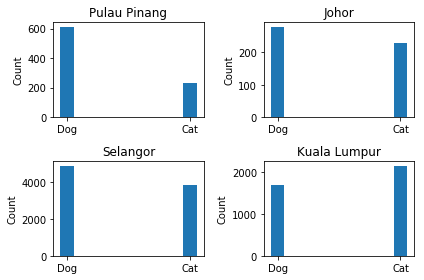

In [5]:
titles = ['Pulau Pinang','Johor','Selangor','Kuala Lumpur']
my_bins = [.9,1.9,2.9]
ind = np.array(my_bins[:-1])
width = np.array([my_bins[i+1]-my_bins[i] for i in range(len(my_bins)-1)])
ind = np.array([.55,1.45])
f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(state_list_of_types[titles[idx]])
    ax.set_title(titles[idx])
    ax.set_ylabel('Count')
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(('Dog', 'Cat'))
plt.tight_layout()

In [6]:
sliced_train = train_copy[["Type", "State", "AdoptionSpeed","Breed1","Breed2","MaturitySize"]]

In [8]:
#Key is the State name (string) and value is its corresponding StateID
state_dict_reverse = dict(zip(state_labels["StateName"], state_labels["StateID"]))

#create two dictionaries for Dog and Cat, where key is the state and value is dataframe containing adoptability, breeds, and maturity size for
#for the respective state
state_dfs_dogs = dict()
state_dfs_cats = dict()

for key in state_dict_reverse:
    state_dfs_dogs[key] = sliced_train.loc[(sliced_train['Type'] == 1) & 
                                      (sliced_train['State'] == state_dict_reverse[key]) , ["AdoptionSpeed","Breed1","Breed2","MaturitySize"]]
    state_dfs_cats[key] = sliced_train.loc[(sliced_train['Type'] == 2) & 
                                      (sliced_train['State'] == state_dict_reverse[key]) , ["AdoptionSpeed","Breed1","Breed2","MaturitySize"]]



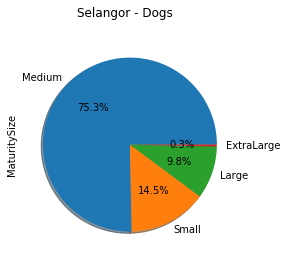

In [37]:
state = 'Selangor'
ax=state_dfs_dogs[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Dogs',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

In [48]:
state_dfs_dogs['Johor'].MaturitySize.value_counts()

2    198
1     40
3     39
4      1
Name: MaturitySize, dtype: int64

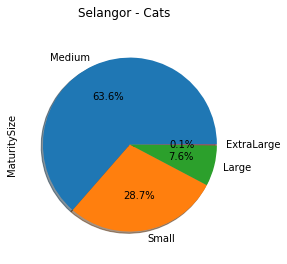

In [38]:
ax=state_dfs_cats[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Cats',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

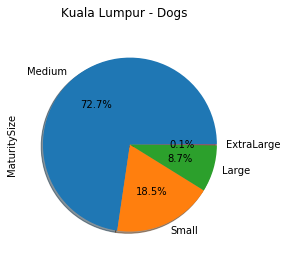

In [40]:
state = 'Kuala Lumpur'
ax=state_dfs_dogs[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Dogs',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

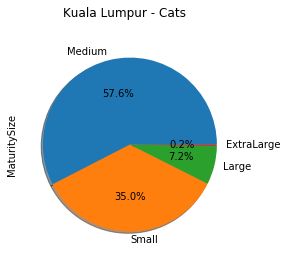

In [41]:
ax=state_dfs_cats[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Cats',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

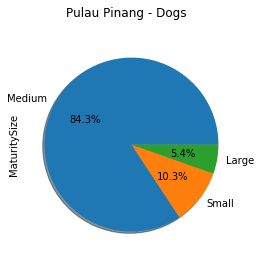

In [43]:
state = 'Pulau Pinang'
ax=state_dfs_dogs[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Dogs',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

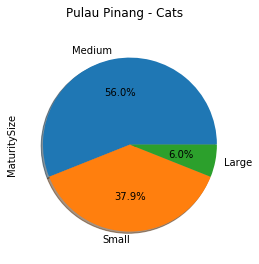

In [44]:
ax=state_dfs_cats[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Cats',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

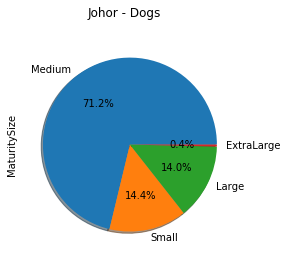

In [46]:
state = 'Johor'
ax=state_dfs_dogs[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Dogs',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

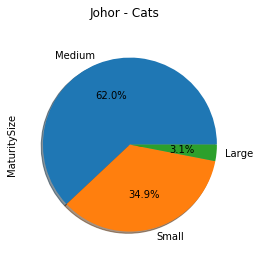

In [47]:
ax=state_dfs_cats[state].MaturitySize.value_counts().plot(kind='pie',title=state + ' - Cats',subplots=True,sharex=True,sharey=True,shadow=True,autopct="%1.1f%%",labels=["Medium","Small","Large","ExtraLarge"])

In [64]:
dog_breeds = breed_labels.loc[(breed_labels["Type"] == 1), ["BreedID","BreedName"]]
dog_df = sliced_train.loc[(sliced_train["Type"] == 1), ["Breed1"]]
dog_breed_dict = dog_breeds.set_index('BreedID')['BreedName'].to_dict()
dog_df_string = dog_df['Breed1'].replace(dog_breed_dict)

dbreeds = dog_df_string.values
dbreeds_list = list(dbreeds)
dbreeds_text = ''.join(str(x) + ' ' for x in dbreeds_list)

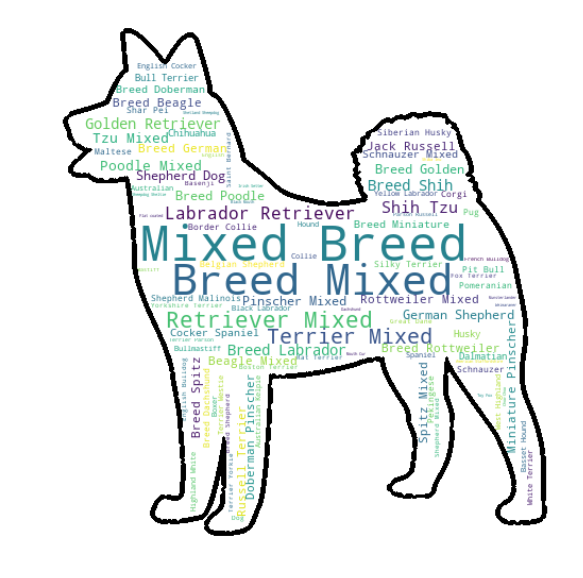

In [65]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
dog_mask = np.array(Image.open("doge_coin.png"))

transformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)

for i in range(len(dog_mask)):
    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))

wc = WordCloud(background_color="white", max_words=1000, mask=transformed_dog_mask, contour_width=3)

wc.generate(dbreeds_text)

# store to file
wc.to_file("dog.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [68]:
cat_breeds = breed_labels.loc[(breed_labels["Type"] == 2), ["BreedID","BreedName"]]
cat_df = train_copy.loc[(train_copy["Type"] == 2), ["Breed1"]]
cat_breed_dict = cat_breeds.set_index('BreedID')['BreedName'].to_dict()
cat_df_string = cat_df['Breed1'].replace(cat_breed_dict)

cbreeds = cat_df_string.values
cbreeds_list = list(cbreeds)
cbreeds_text = ''.join(str(x) + ' ' for x in cbreeds_list)

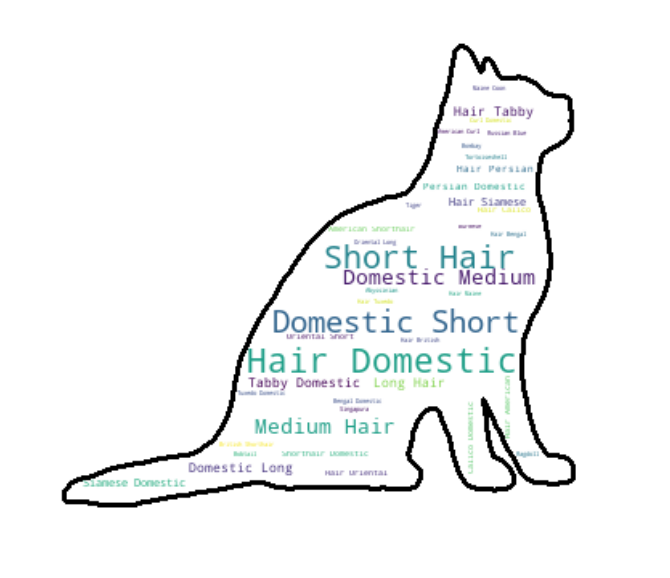

In [69]:
cat_mask = np.array(Image.open("lt_grey_cat.png"))

transformed_cat_mask = np.ndarray((cat_mask.shape[0],cat_mask.shape[1]), np.int32)

for i in range(len(cat_mask)):
    transformed_cat_mask[i] = list(map(transform_format, cat_mask[i]))
    

wc = WordCloud(background_color="white", max_words=1000, mask=transformed_cat_mask, contour_width=3)


wc.generate(cbreeds_text)

# store to file
wc.to_file("cat.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



In [27]:
# create dicitionaries (with States as keys) where the values are average adoptabilities for respective maturity size
avg_adopt_by_msize_dogs = dict()
avg_adopt_by_msize_cats = dict()

for key in state_dfs_dogs:
    dog_avg = []
    cat_avg = []
    for i in range(1,5):
        dog_avg.append(state_dfs_dogs[key].loc[(state_dfs_dogs[key]['MaturitySize'] == i),['AdoptionSpeed']].mean()[0])
        cat_avg.append(state_dfs_cats[key].loc[(state_dfs_cats[key]['MaturitySize'] == i),['AdoptionSpeed']].mean()[0])
        
    avg_adopt_by_msize_dogs[key] = dog_avg
    avg_adopt_by_msize_cats[key] = cat_avg

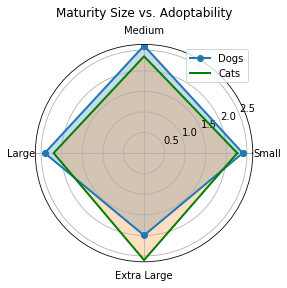

In [57]:
state = 'Selangor'
labels = ["Small","Medium","Large","Extra Large"]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
dog_stats=np.concatenate((avg_adopt_by_msize_dogs[state],[avg_adopt_by_msize_dogs[state][0]]))
cat_stats=np.concatenate((avg_adopt_by_msize_cats[state],[avg_adopt_by_msize_cats[state][0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, dog_stats, 'o-', linewidth=2)
ax.plot(angles, cat_stats, 'g-', linewidth=2)
ax.legend(['Dogs','Cats'])
ax.fill(angles, dog_stats, alpha=0.25)
ax.fill(angles, cat_stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Maturity Size vs. Adoptability',y=1.1)
ax.grid(True)

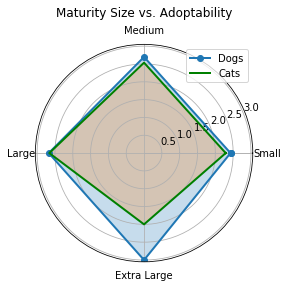

In [59]:
state = 'Kuala Lumpur'
labels = ["Small","Medium","Large","Extra Large"]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
dog_stats=np.concatenate((avg_adopt_by_msize_dogs[state],[avg_adopt_by_msize_dogs[state][0]]))
cat_stats=np.concatenate((avg_adopt_by_msize_cats[state],[avg_adopt_by_msize_cats[state][0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, dog_stats, 'o-', linewidth=2)
ax.plot(angles, cat_stats, 'g-', linewidth=2)
ax.legend(['Dogs','Cats'])
ax.fill(angles, dog_stats, alpha=0.25)
ax.fill(angles, cat_stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Maturity Size vs. Adoptability', y=1.1)
ax.grid(True)



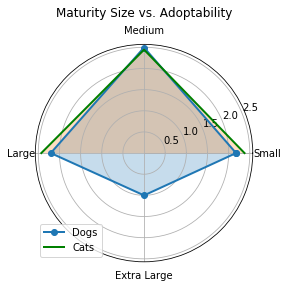

In [60]:
state = 'Johor'
labels = ["Small","Medium","Large","Extra Large"]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
dog_stats=np.concatenate((avg_adopt_by_msize_dogs[state],[avg_adopt_by_msize_dogs[state][0]]))
cat_stats=np.concatenate((avg_adopt_by_msize_cats[state],[avg_adopt_by_msize_cats[state][0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, dog_stats, 'o-', linewidth=2)
ax.plot(angles, cat_stats, 'g-', linewidth=2)
ax.fill(angles, dog_stats, alpha=0.25)
ax.fill(angles, cat_stats, alpha=0.25)
ax.legend(['Dogs','Cats'])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Maturity Size vs. Adoptability',y=1.1)
ax.grid(True)

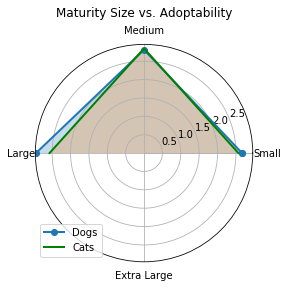

In [61]:
state = 'Pulau Pinang'
labels = ["Small","Medium","Large","Extra Large"]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
dog_stats=np.concatenate((avg_adopt_by_msize_dogs[state],[avg_adopt_by_msize_dogs[state][0]]))
cat_stats=np.concatenate((avg_adopt_by_msize_cats[state],[avg_adopt_by_msize_cats[state][0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, dog_stats, 'o-', linewidth=2)
ax.plot(angles, cat_stats, 'g-', linewidth=2)
ax.fill(angles, dog_stats, alpha=0.25)
ax.fill(angles, cat_stats, alpha=0.25)
ax.legend(['Dogs','Cats'])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Maturity Size vs. Adoptability',y=1.1)
ax.grid(True)

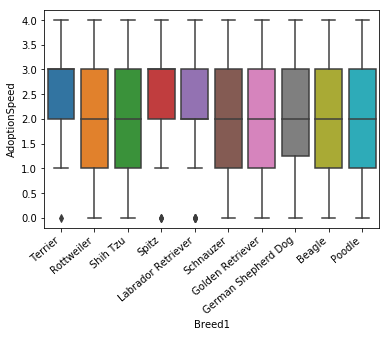

In [71]:
dog_df = sliced_train.loc[(train_copy["Type"] == 1), ["Breed1","AdoptionSpeed"]]
dog_top10_ids = dog_df['Breed1'].value_counts()[1:11]
dog_top10_ids_list = dog_top10_ids.index.values.tolist()
dog_top10 = dog_df.loc[(dog_df["Breed1"].isin(dog_top10_ids_list)), ["Breed1", "AdoptionSpeed"]]
dog_top10['Breed1'] = dog_top10['Breed1'].replace(dog_breed_dict)
dog_top10_ids = dog_top10['Breed1'].value_counts()[0:11]
dog_top10_ids_list = dog_top10_ids.index.values.tolist()

bnw=sns.boxplot(x = dog_top10['Breed1'], y=dog_top10["AdoptionSpeed"] )
ax=bnw.set_xticklabels(bnw.get_xticklabels(), rotation=40, ha="right")

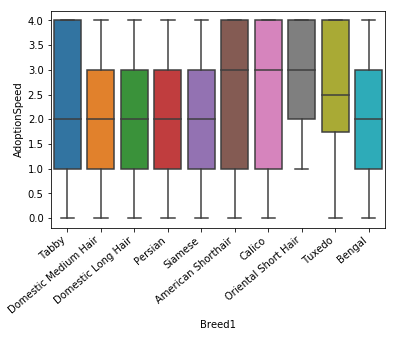

In [72]:
cat_df = sliced_train.loc[(train_copy["Type"] == 2), ["Breed1","AdoptionSpeed"]]
cat_top10_ids = cat_df['Breed1'].value_counts()[1:11]
cat_top10_ids_list = cat_top10_ids.index.values.tolist()
cat_top10 = cat_df.loc[(cat_df["Breed1"].isin(cat_top10_ids_list)), ["Breed1", "AdoptionSpeed"]]
cat_top10['Breed1'] = cat_top10['Breed1'].replace(cat_breed_dict)
cat_top10_ids = cat_top10['Breed1'].value_counts()[0:11]
cat_top10_ids_list = cat_top10_ids.index.values.tolist()

bnw=sns.boxplot(x = cat_top10['Breed1'], y=cat_top10["AdoptionSpeed"] )
ax=bnw.set_xticklabels(bnw.get_xticklabels(), rotation=40, ha="right")

In [73]:
avg_adopt_by_breed_dogs = dict()
avg_adopt_by_breed_cats = dict()

for i in range(len(dog_top10_ids_list)):
    avg_adopt_by_breed_dogs[dog_top10_ids_list[i]] = dog_top10.loc[(dog_top10['Breed1'] == dog_top10_ids_list[i]),['AdoptionSpeed']].mean()[0]
    avg_adopt_by_breed_cats[cat_top10_ids_list[i]] = cat_top10.loc[(cat_top10['Breed1'] == cat_top10_ids_list[i]),['AdoptionSpeed']].mean()[0]
        

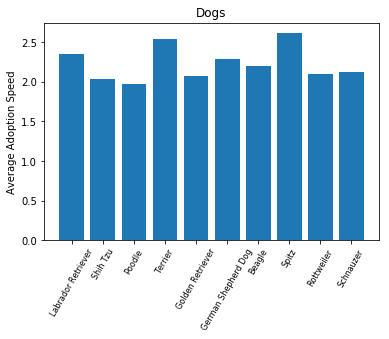

In [93]:
ax=plt.bar(range(len(avg_adopt_by_breed_dogs)), list(avg_adopt_by_breed_dogs.values()), align='center')
ax=plt.xticks(range(len(avg_adopt_by_breed_dogs)), list(avg_adopt_by_breed_dogs.keys()),fontsize=8, rotation=60)
ax=plt.ylabel('Average Adoption Speed')
ax=plt.title('Dogs')

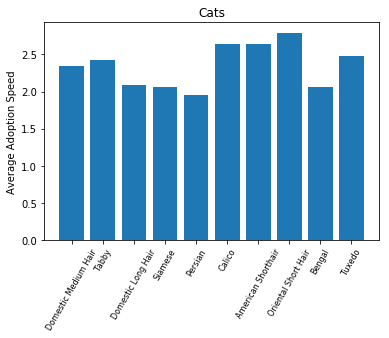

In [96]:
ax=plt.bar(range(len(avg_adopt_by_breed_cats)), list(avg_adopt_by_breed_cats.values()), align='center')
ax=plt.xticks(range(len(avg_adopt_by_breed_cats)), list(avg_adopt_by_breed_cats.keys()),fontsize=8, rotation=60)
ax=plt.ylabel('Average Adoption Speed')
ax=plt.title('Cats')